## I'M Trying to Check for Stationality in the series


- Gonna use only cases Data for test purposes.

## Continuationns from the Analysis Part
    - This is a continuation from previous part that i did of analysis.
    - The link is here (https://github.com/Stephen-Kamau/Covid19_Analysis/blob/master/Corona.ipynb)(Analysis Part)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',50)
sns.set(style = 'darkgrid')
import plotly.express as px
import plotly.graph_objects as go

In [3]:
#stats model api
import statsmodels.api as sm

In [4]:
# reading processed timeseries from the previous analysis phase
df = pd.read_csv('cleaned_results.csv')

In [5]:
df.head()

,cases,deaths,recovered,country,Date
0,0,0,0,Afghanistan,1/22/20
1,0,0,0,Afghanistan,1/23/20
2,0,0,0,Afghanistan,1/24/20
3,0,0,0,Afghanistan,1/25/20
4,0,0,0,Afghanistan,1/26/20


In [6]:
#chenge date to datetime field
df.Date = pd.to_datetime(df.Date)

In [7]:
#lets group datewise
df = df.groupby('Date').sum()[['cases' , 'deaths' , 'recovered']]

In [8]:
df.tail()

,cases,deaths,recovered
Date,,,
2020-07-01,10664168,516253,5469134
2020-07-02,10871926,521361,5754006
2020-07-03,11074878,526411,5863847
2020-07-04,11267309,530754,6059565
2020-07-05,11449707,534267,6179006


In [9]:
# 11449707 - 11267309

In [10]:
# get daily data
daily_cases = []
daily_deaths = []
daily_recovers = []
for i in range(df.shape[0]):
    if (i == 0):
#         cases
        cc = 0
        ca = df.iloc[0].cases
        daily_cases.append(abs(ca-cc))
        
#         deaths
        dd = 0
        da = df.iloc[0].deaths
        daily_deaths.append(abs(da-dd))
        
                #         recovers
        rr = 0
        ra = df.iloc[0].recovered
        daily_recovers.append(abs(ra-rr))
        
    elif (i+1) <= df.shape[0]:
#         cases
        cc = df.iloc[i-1].cases
        ca = df.iloc[i].cases
        daily_cases.append(abs(ca-cc)) 
        
        #         deaths
        dd = df.iloc[i-1].deaths
        da = df.iloc[i].deaths
        daily_deaths.append(abs(da-dd))
        
                #         recovers
        rr = df.iloc[i-1].recovered
        ra = df.iloc[i].recovered
        daily_recovers.append(abs(ra-rr))

In [11]:
len(daily_cases) , len(daily_recovers)  , len(daily_deaths)

(166, 166, 166)

In [12]:
df['daily_cases'] = daily_cases
df['daily_deaths'] = daily_deaths
df['daily_recovers'] = daily_recovers

In [13]:
df.head()

,cases,deaths,recovered,daily_cases,daily_deaths,daily_recovers
Date,,,,,,
2020-01-22,555,17,28,555,17,28
2020-01-23,654,18,30,99,1,2
2020-01-24,941,26,36,287,8,6
2020-01-25,1434,42,39,493,16,3
2020-01-26,2118,56,52,684,14,13


In [14]:
#droping ddate column
# df.drop('Date' , axis = 1 , inplace = True)

In [15]:
#set date as index
# df.set_index(df.Date , inplace = True)

In [16]:
#we now have our timeseries with 3 fields cases , deaths and recovered

In [17]:
#checking stationality
def check_stationary(timeseries):
    '''
    defining  the rolling statistics on seven days basis ...weekly 
    '''
    rol_mean =  timeseries.rolling(window=7,center=False).mean()
    rol_std = timeseries.rolling(window=7,center=False).std()
    '''
    plot rolling statistics
    '''
    orig = plt.plot(timeseries, color='blue',label='Original Ts')
    mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_std, color='black', label = 'Rolling Std')
    plt.xlabel('time')
    plt.ylabel('Number of calls')
    plt.legend(loc='best')
    plt.title('Rolling Mean And Standard Deviation')
    plt.show(block=False)

In [18]:
#checking p-values and other stats using adfulller method and stationary..
# Note the data is more stationary as p-values is more to zero
from statsmodels.tsa.stattools import adfuller as ad
def check_stationary_adfuller(data):
    print("Adfuller Method")
    ad_test = ad(data , autolag = "AIC")
    ad_res = pd.Series(ad_test[0:4] , index = ["Test Statistic", "p-value" ,"#Lags Used" , "Number of Observation Used" ])
    for key , value in ad_test[4].items():
        print(f"Critical Value {key}   {value}\n")
    print(ad_res)

## Daily Cases

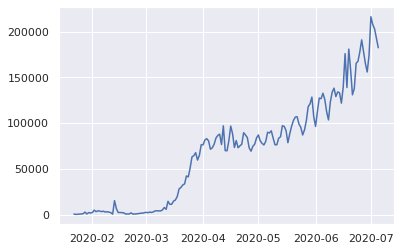

In [19]:
plt.plot(df['daily_cases'])

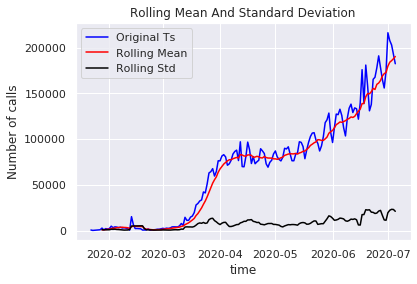

Adfuller Method
Critical Value 1%   -3.4729792729247793

Critical Value 5%   -2.8802520918255534

Critical Value 10%   -2.5767469641683105

Test Statistic                  0.484933
p-value                         0.984408
#Lags Used                      9.000000
Number of Observation Used    156.000000
dtype: float64


In [20]:
#lets run the function on cases
check_stationary(df['daily_cases'])
check_stationary_adfuller(df['daily_cases'])

##  Its not stationary as shown by curve and p-value

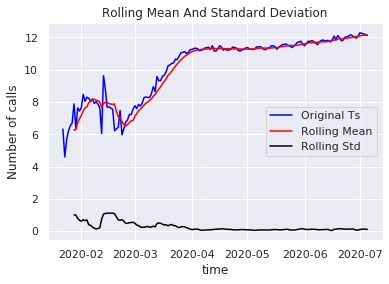

Adfuller Method
Critical Value 1%   -3.4744158894942156

Critical Value 5%   -2.880878382771059

Critical Value 10%   -2.577081275821236

Test Statistic                 -0.959199
p-value                         0.767853
#Lags Used                     14.000000
Number of Observation Used    151.000000
dtype: float64


In [21]:
#take log of the df['cases']
cases = df['daily_cases']
ts_cases_log = np.log(cases)
check_stationary(ts_cases_log)
check_stationary_adfuller(ts_cases_log)

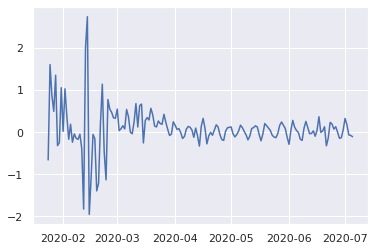

In [22]:
#using shift to make statinary
ts_cases_log_diff = ts_cases_log - ts_cases_log.shift(2)
plt.plot(ts_cases_log_diff)

In [23]:
ts_cases_log_diff.dropna(inplace = True)

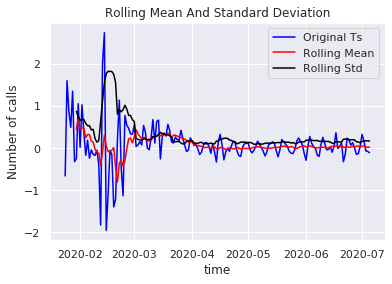

Adfuller Method
Critical Value 1%   -3.474714913481481

Critical Value 5%   -2.881008708148148

Critical Value 10%   -2.5771508444444446

Test Statistic                 -3.063731
p-value                         0.029356
#Lags Used                     13.000000
Number of Observation Used    150.000000
dtype: float64


In [24]:
check_stationary(ts_cases_log_diff)
check_stationary_adfuller(ts_cases_log_diff)

In [25]:
## We are approachiong the stationality since the p-value is greatly approaching zero.

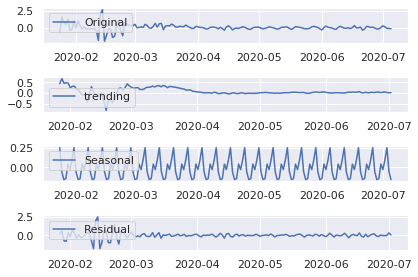

In [26]:
#checking for seasonality , trend etc
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts_cases_log_diff)
trend = decompose.trend
resid = decompose.resid
season = decompose.seasonal

#draw graphs
plt.subplot(411)
plt.plot(ts_cases_log_diff , label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend , label = "trending")
plt.legend(loc = "best")

plt.subplot(413)
plt.plot(season , label = "Seasonal")
plt.legend(loc = "best")

plt.subplot(414)
plt.plot(resid , label = "Residual")
plt.legend(loc = "best")

plt.tight_layout()

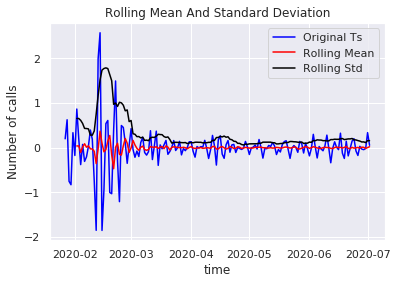

Adfuller Method
Critical Value 1%   -3.4759527332353084

Critical Value 5%   -2.881548071241103

Critical Value 10%   -2.577438765246763

Test Statistic               -9.651706e+00
p-value                       1.428988e-16
#Lags Used                    1.100000e+01
Number of Observation Used    1.460000e+02
dtype: float64


In [27]:
#using residual for checking
decompose_df =resid
decompose_df.dropna(inplace = True)
check_stationary(decompose_df)
check_stationary_adfuller(decompose_df)

In [28]:
##here the p-value is almost zero....its very small thus we cann do the prediction using this

In [29]:
decompose_df

Date
2020-01-27    0.199429
2020-01-28    0.625748
2020-01-29   -0.751020
2020-01-30   -0.828253
2020-01-31    0.335610
                ...   
2020-06-28   -0.031589
2020-06-29   -0.043678
2020-06-30   -0.018153
2020-07-01    0.337008
2020-07-02    0.054475
Name: daily_cases, Length: 158, dtype: float64

In [30]:
# np.exp(ts_cases_log_diff+ts_cases_log.shift(2)).tail()


In [31]:
# df['daily_cases'].tail()

In [32]:
#lets use ts_log_diff since it looks more stationeery
from statsmodels.tsa.stattools import acf , pacf
lag_acf = acf(ts_cases_log_diff , nlags = 20)
lag_pacf =pacf(ts_cases_log_diff , nlags = 20 , method = 'ols')

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf
# help(graphics)

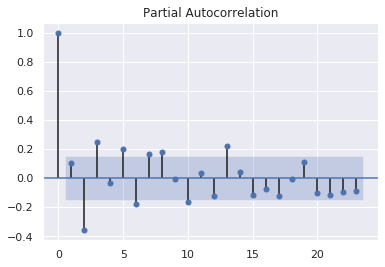

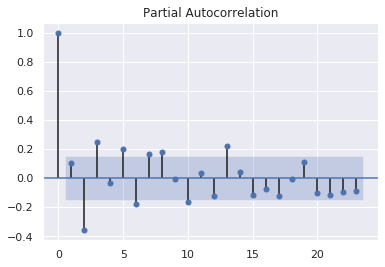

In [34]:
plot_pacf(ts_cases_log_diff)

In [35]:
# value of p is around 3

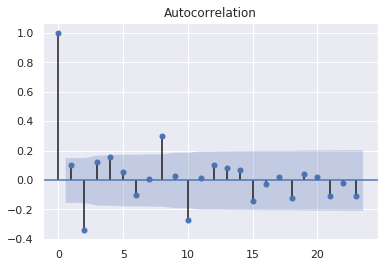

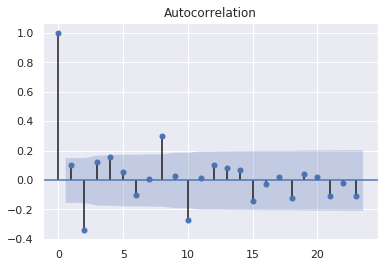

In [36]:
plot_acf(ts_cases_log_diff)

In [37]:
# q value maybe 9

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
# d = 1 , q = 9 , p = 3
len(ts_cases_log_diff)

164

In [40]:
df.shape

(166, 6)

In [41]:
train_cases = ts_cases_log_diff[0:120]

In [42]:
test_cases = ts_cases_log_diff[120:]

In [43]:

test_cases.shape

(44,)

In [44]:
train_cases.shape

(120,)

In [45]:
train_cases.head()

Date
2020-01-24   -0.659486
2020-01-25    1.605389
2020-01-26    0.868476
2020-01-27    0.495290
2020-01-28    1.354734
Name: daily_cases, dtype: float64

In [46]:
# d was 0.04
model = ARIMA(train_cases.values , order = (2,1,3))

In [47]:
model_fit = model.fit(disp= False)

In [48]:
model_fit.aic
# model_fit.summary()

183.7816126369305

In [49]:
preds = model_fit.forecast(steps = len(test_cases))[0]
test_case = pd.DataFrame(test_cases)

In [50]:
test_case.shape

(44, 1)

In [51]:
test_case['preds'] = preds


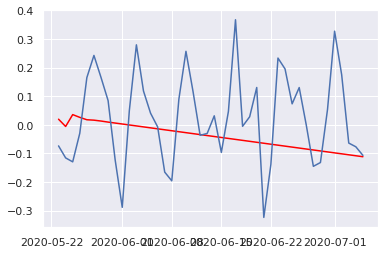

In [52]:
# test_case.head()
plt.plot(test_case['preds'] , color = 'red')
plt.plot(test_case['daily_cases'])

In [54]:
from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(test_case['daily_cases'] , test_case['preds'])))

0.1759733717808542
